In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_ta as ta
import mplfinance as mpf
import scipy
from scipy import stats
from scipy import signal
import math
#https://github.com/neurotrader888

In [2]:
scaled=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\Technical analysis\\BTCUSDT86400.csv',index_col='date')
scaled

,open,high,low,close
date,,,,
2018-01-02,13382.16,15473.49,12890.02,14675.11
2018-01-03,14690.00,15307.56,14150.00,14919.51
2018-01-04,14919.51,15280.00,13918.04,15059.54
2018-01-05,15059.56,17176.24,14600.00,16960.39
2018-01-06,16960.39,17143.13,16011.21,17069.79
...,...,...,...,...
2022-12-27,16919.39,16972.83,16592.37,16706.36
2022-12-28,16706.06,16785.19,16465.33,16547.31
2022-12-29,16547.32,16664.41,16488.91,16633.47


In [3]:
scaled['high'][0]

15473.490000000002

In [4]:
scaled.index.to_numpy()

array(['2018-01-02', '2018-01-03', '2018-01-04', ..., '2022-12-29',
       '2022-12-30', '2022-12-31'], dtype=object)

In [5]:
up_zig=True# Last extreme is a bottum. next is a top
tmp_max=scaled['high'][0]
tmp_min=scaled['low'][0]
tmp_max_i=0
tmp_min_i=0
tops=[]
bottoms=[]
sigma=0.03
for i in range(len(scaled)):
    if up_zig:# Last extreme is a bottom
        if scaled['high'][i]>tmp_max:
            #New high, update
            tmp_max=scaled['high'][i]
            tmp_max_i=i
        elif scaled['close'][i]< (tmp_max-(tmp_max*sigma)):
            #price retraced by sigma %.
            top=[i,tmp_max_i,tmp_max]
            tops.append(top)
            
            #setup for next bottom
            up_zip=False
            tmp_min=scaled['low'][i]
            tmp_min_i=i
    else:# Last extreme is a top
        if scaled['low'][i]<tmp_min:
            #new low, update
            tmp_min=scaled['low'][i]
            tmp_min_i=i
        elif scaled['close'][i]> tmp_min + tmp_min*sigma:
            bottom=[i,tmp_min_i,tmp_min]
            bottoms.append(bottom)
            
            #Setup for next top
            up_zig=True
            tmp_max=scaled['high'][i]
            tmp_max=_i=i
        

In [6]:
def directional_change(close: np.array, high: np.array,index : np.array ,low: np.array, sigma: float):
    
    up_zig = True # Last extreme is a bottom. Next is a top. 
    tmp_max = high[0]
    tmp_min = low[0]
    tmp_max_i = 0
    tmp_min_i = 0

    tops = []
    bottoms = []
    x=[]
    for i in range(len(close)):
        if up_zig: # Last extreme is a bottom
            if high[i] > tmp_max:
                # New high, update 
                tmp_max = high[i]
                tmp_max_i = i
            elif close[i] < tmp_max - tmp_max * sigma: 
                # Price retraced by sigma %. Top confirmed, record it
                # top[0] = confirmation index
                # top[1] = index of top
                # top[2] = price of top
                top = [index[i], tmp_max]
                tops.append(top)

                # Setup for next bottom
                up_zig = False
                tmp_min = low[i]
                tmp_min_i = i
        else: # Last extreme is a top
            if low[i] < tmp_min:
                # New low, update 
                tmp_min = low[i]
                tmp_min_i = i
            elif close[i] > tmp_min + tmp_min * sigma: 
                # Price retraced by sigma %. Bottom confirmed, record it
                # bottom[0] = confirmation index
                # bottom[1] = index of bottom
                # bottom[2] = price of bottom
                bottom = [index[i], tmp_min]
                bottoms.append(bottom)

                # Setup for next top
                up_zig = True
                tmp_max = high[i]
                tmp_max_i = i

    return tops, bottoms

In [7]:
tops, bottoms = directional_change(scaled['close'].to_numpy(), scaled['high'].to_numpy(),scaled.index.to_numpy(),scaled['low'].to_numpy(), 0.03)
tops

[['2018-01-02', 15473.490000000002],
 ['2018-01-07', 17176.24],
 ['2018-01-10', 15500.0],
 ['2018-01-14', 14580.0],
 ['2018-01-16', 14249.99],
 ['2018-01-19', 11878.82],
 ['2018-01-21', 13099.0],
 ['2018-01-26', 11794.05],
 ['2018-01-29', 12244.0],
 ['2018-02-04', 9473.010000000002],
 ['2018-02-08', 8476.0],
 ['2018-02-11', 9065.78],
 ['2018-02-13', 8989.0],
 ['2018-02-21', 11786.01],
 ['2018-03-06', 11710.0],
 ['2018-03-13', 9888.88],
 ['2018-03-17', 8611.64],
 ['2018-03-22', 9177.01],
 ['2018-03-25', 8999.95],
 ['2018-04-01', 7223.36],
 ['2018-04-04', 7520.0],
 ['2018-04-10', 7185.0],
 ['2018-04-16', 8429.54],
 ['2018-04-26', 9759.82],
 ['2018-04-30', 9570.51],
 ['2018-05-06', 10020.0],
 ['2018-05-15', 8879.99],
 ['2018-05-22', 8609.0],
 ['2018-06-04', 7786.69],
 ['2018-06-09', 7765.0],
 ['2018-06-15', 6719.999999999999],
 ['2018-06-22', 6841.74],
 ['2018-06-26', 6350.0],
 ['2018-07-05', 6784.920000000001],
 ['2018-07-10', 6818.159999999999],
 ['2018-07-21', 7699.999999999999],
 ['20

In [8]:
tp=pd.DataFrame()
tp[['Date','Price']]=tops
tp.index=tp.Date
tp
x=pd.to_datetime(tp.index)
tp.set_index(x, inplace=True)
t=tp.asfreq('D')

In [9]:
bt=pd.DataFrame()
bt[['Date','Price']]=bottoms
bt.index=bt.Date
y=pd.to_datetime(bt.index)
bt.set_index(y, inplace=True)
f=tp.asfreq('D')

In [10]:
bt

,Date,Price
Date,,
2018-01-03,2018-01-03,12890.02
2018-01-09,2018-01-09,12812.0
2018-01-12,2018-01-12,11400.0
2018-01-15,2018-01-15,12569.2
2018-01-17,2018-01-17,9035.0
...,...,...
2022-11-15,2022-11-15,15815.21
2022-11-22,2022-11-22,15476.0
2022-11-30,2022-11-30,15995.27


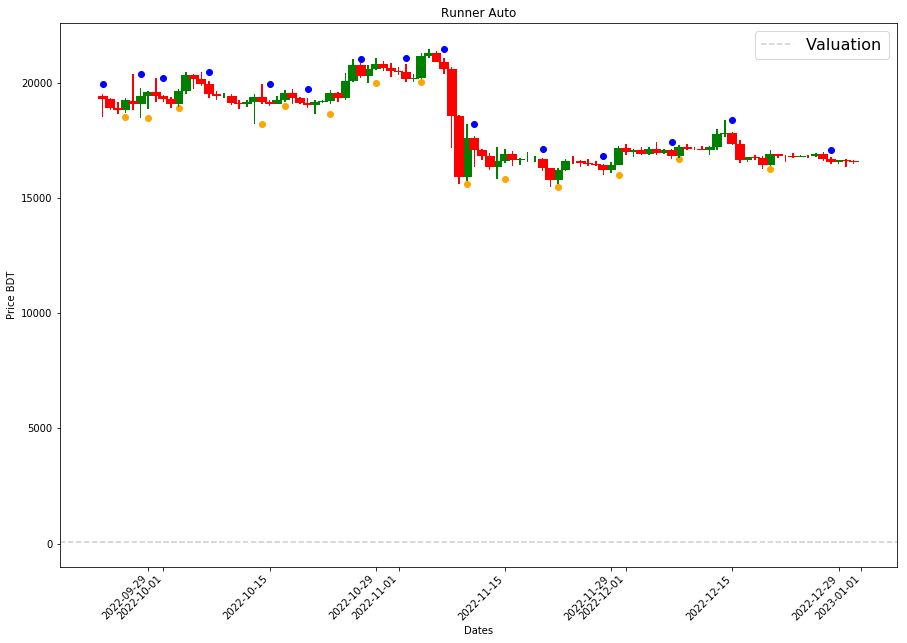

In [11]:
df=scaled[-100:]

m=pd.to_datetime(df.index)
m
df.set_index(m, inplace=True)
t=df.asfreq('D')

#create figure
plt.figure(figsize=(15,10))
df1=df
#define width of candlestick elements
width = 1.3
width2 = 0.2

#define up and down prices
up = df1[df1.close>=df1.open]
down = df1[df1.close<df1.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.close,width2,bottom=down.close,color=col2)
plt.bar(down.index,down.low-down.open,width2,bottom=down.open,color=col2)

plt.scatter(tp.loc['2022-09-23':].index,tp.loc['2022-09-23':].Price.values,color='b')
plt.scatter(bt.loc['2022-09-23':].index,bt.loc['2022-09-23':].Price.values,color='orange')


#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.title('Runner Auto')
plt.xlabel('Dates')
plt.ylabel('Price BDT')
plt.axhline(70, color='k', linestyle='--', alpha=0.2,label='Valuation')
plt.legend( fontsize=16)
plt.show()